### Basic Ergonomic Colors
Here is a small palette of colors in groups of consistent brightnesses, with subgroups of consistent chromas:

In [1]:
SIMPLE_COLORS = [
    [['#000000']],
    [['#313131'], ['#620000', '#002595']],
    [['#5a5959'], ['#7c4940', '#4a5b7d', '#3b6541'], ['#aa0005', '#0448fa']],
    [['#979797'],
    ['#ac8ca8', '#829cb4', '#7ea281', '#b58d6d'],
    ['#dd5ed9', '#18a3fe', '#00b54e', '#e07508']],
    [['#dbdbdb'],
    ['#c4e5c5', '#bde5e5', '#e7daae', '#fdccd7', '#dad8fa'],
    ['#84f995', '#00fbfe', '#ffd54b'],
    ['#74ff05']],
    [['#f5f4f4'], ['#f3f9c6', '#d3ffff'], ['#f5ff15']],
    [['#ffffff']]
]

In [2]:
from IPython.display import HTML
from hyooze.html import * # github.com/TedSinger/hyooze
HTML(demo(SIMPLE_COLORS))

By picking colors across brightness groups, you get a consistent contrast ratio. High contrast ratios make text legible. Readability counts!

By picking colors of different chromas in the same brightness group, you can easily create an [attention hierarchy](https://colorusage.arc.nasa.gov/Percept_layers_1.php) without sacrificing contrast ratio unexpectedly.

By picking colors of different hue in the same brightness+chroma group, you can add boundary hints (such as syntax highlighting or zebra striping) without interfering with the attention hierarchy or contrast ratio.

This was tricky! Equal spacing in RGB or HSL does the wrong thing. The brightness and chroma _perceptual correlates_ are totally unaligned with the RGB colorspace, and not consistently correlated with HSL or any other computer-and-mathematics-friendly colorspace:

In [3]:
HTML(LIME_ON_BLUE)

The green in our RGB monitors is much brighter (perceptually, if not physically) than the red or blue. This is why the above table is missing bright saturated red and blue. Those colors just aren't possible on our displays under normal calibration. Note that this is different from [Impossible Colors](https://en.wikipedia.org/wiki/Impossible_color).

The shape of the RGB color gamut in a perceptually uniform space* is complicated. But mathematically, our problem is straightforward. We want contours of equal chroma on contours of equal brightness.

For each brightness level, I am choosing the grey, plus two levels of chroma. The high chromas are generally as high as possible, and the low chromas are at most one third of the high chromas. There are some compromises to allow a palette of well-separated hues, and there's an opportunistic saturated green in the 155 brightness level.

The hues for saturated colors are as separated as possible. The hues for the first pastels in each brightness group align with the saturated colors, and the rest are equal spaced.

In [4]:
from hyooze.perception import BRIGHT_OFFICE
from hyooze.analysis import display, ArcDict
%matplotlib inline
matches = {}
hue_choices = {}

These brightness values are the most extreme that still offer some useful chroma to build a palette with:

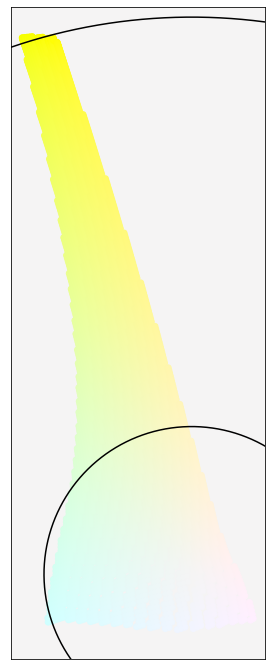

In [5]:
matches[169] = display(BRIGHT_OFFICE,
                       169,
                       [22, 83],
                       resolution=1)

In [6]:
for chroma, hues in matches[169].items():
    print(chroma, hues)

0 ArcDict([0: #f5f4f4])
22 ArcDict([-173.0: #d2fff8, -161.5: #d3ffff], [92.0: #fff5c5, 151.9: #d8ffe2])
83 ArcDict([104.2: #fffc09, 107.5: #f5ff00])


In [7]:
hue_choices[169] = {0:[0]}
hue_choices[169][83] = [107.5]
hue_choices[169][22] = [107.5, -161.5]

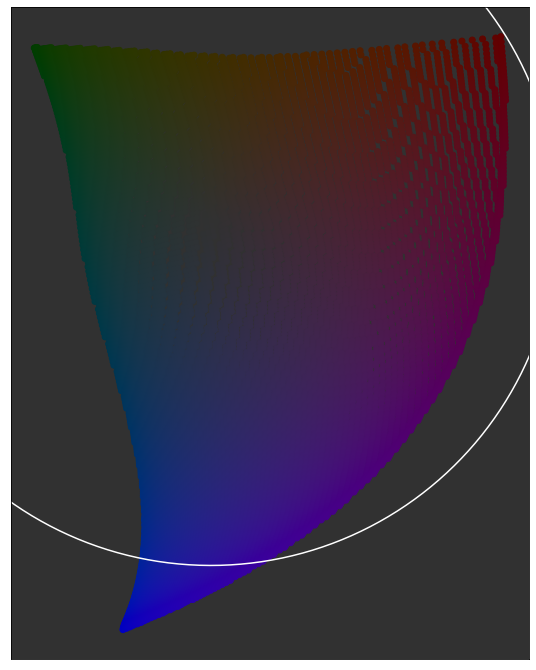

In [8]:
matches[51] = display(BRIGHT_OFFICE, 51, [50], resolution=1)

In [9]:
for chroma, hues in matches[51].items():
    print(chroma, hues)

0 ArcDict([0: #313131])
50 ArcDict([-101.4: #002595, -78.3: #3d0097], [30.6: #620002, 32.1: #620000])


In [10]:
hue_choices[51] = {0:[0]}
hue_choices[51][50] = [32.9, -101.7]

These are the next brightness levels offering an increased palette:

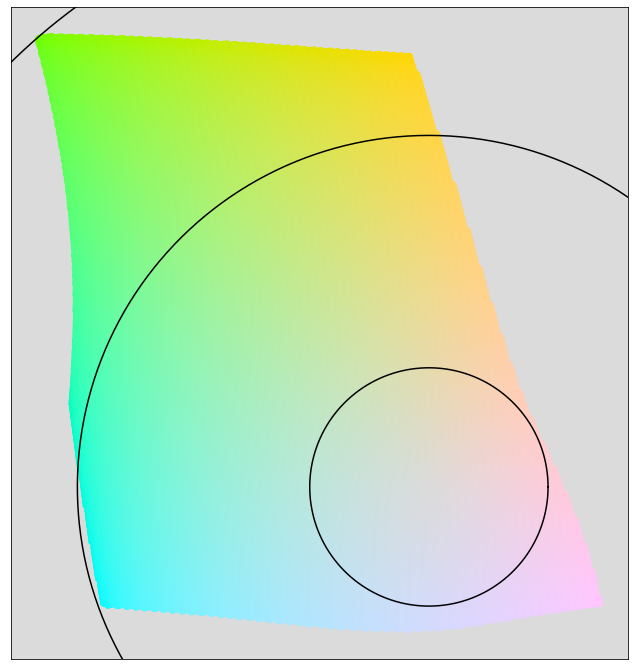

In [11]:
matches[155] = display(BRIGHT_OFFICE, 155, [20, 59, 100], resolution=1)

In [12]:
for chroma, hues in matches[155].items():
    print(chroma, hues)

0 ArcDict([0: #dbdbdb])
20 ArcDict([-179.4: #bde6dc, 179.7: #bbe6db])
59 ArcDict([-180.0: #09fedc, -177.4: #00fee1], [-161.9: #00fbfc, -160.4: #0ffbff], [88.3: #ffd54b, 180.0: #0afedc])
100 ArcDict([130.0: #78ff00, 131.4: #6dff11])


In [13]:
hue_choices[155] = {0:[0]}
hue_choices[155][100] = [130.5]
hue_choices[155][59] = [143.6, -161.1, 88.3]
hue_choices[155][20] = [143.6, -161.1, 88.3, 5.2, -78]

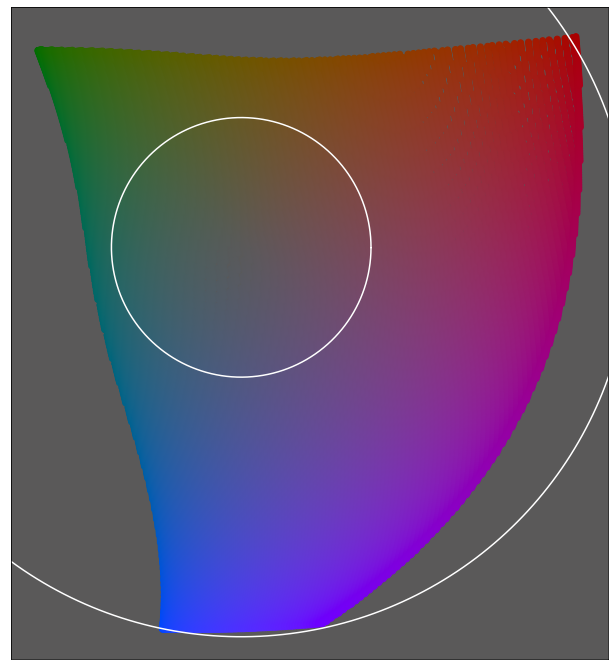

In [14]:
matches[78] = display(BRIGHT_OFFICE, 78, [25, 75], resolution=1)

In [15]:
for chroma, hues in matches[78].items():
    print(chroma, hues)

0 ArcDict([0: #5a5959])
25 ArcDict([-179.9: #21675a, 179.9: #22675a])
75 ArcDict([-101.8: #0048fa, -92.8: #4436ff], [-81.5: #6516ff, -77.0: #6f00fd], [28.3: #aa0011, 32.8: #a80800])


In [16]:
hue_choices[78] = {0:[0]}
hue_choices[78][75] = [31, -101.6]
hue_choices[78][25] = [31, -101.6, 144.7]

There's room for one more level directly between the previous two, with an even broader palette:

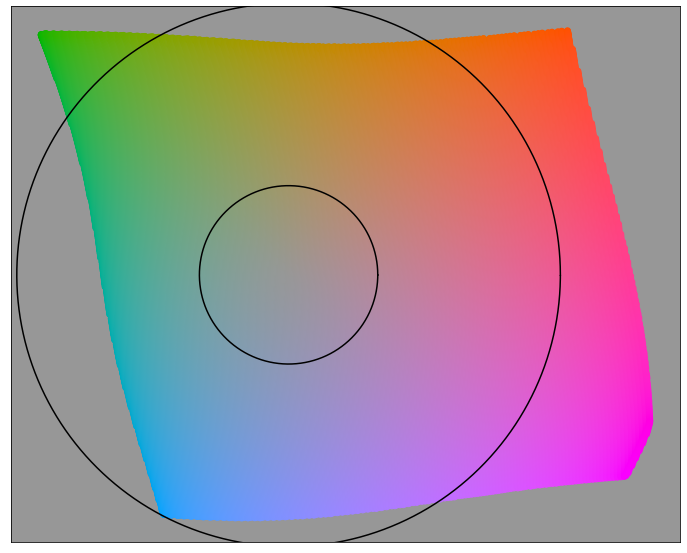

In [17]:
matches[116] = display(BRIGHT_OFFICE, 116, [21, 64], resolution=1)

In [18]:
for chroma, hues in matches[116].items():
    print(chroma, hues)

0 ArcDict([0: #979797])
21 ArcDict([-179.7: #74a398, 179.7: #71a397])
64 ArcDict([-118.3: #00a4fd, -115.8: #24a2ff], [-57.2: #bc72ff, 59.6: #de7700], [117.2: #83a600, 144.7: #00b54e])


In [19]:
hue_choices[116] = {0:[0]}
hue_choices[116][64] = [-29.8, -117, 144.7, 57.5]
hue_choices[116][21] = [-29.8, -117, 144.7, 57.5]

In [20]:
PALETTE = [[[matches[b][c][h] for h in hues] 
            for c, hues in sorted(chromas.items())]
            for b, chromas in sorted(hue_choices.items())]
PALETTE.insert(0, [['#000000']])
PALETTE.append([['#ffffff']])

In [21]:
HTML(demo(PALETTE))

\* I chose CIECAM02, but ideally would have a model for luminous colors instead of dyes. More pressing, I think, is a model that incorporates the H-K effect - those blue peninsulas are quite prominent.
```
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2659800/
    https://www.jstage.jst.go.jp/article/transfun/E100.A/2/E100.A_565/_article
    https://www.osapublishing.org/josaa/fulltext.cfm?uri=josaa-35-12-2000&id=401230```